In [2]:
#importing packages
import pandas as pd
import numpy as np

In [3]:
# Importing the dataset
nb = pd.read_csv('../Dataset/NB.csv')
nb['Fault'] = 0

ir = pd.read_csv('../Dataset/B007.csv')
ir['Fault'] = 1

In [4]:
dataset = nb.append(ir)
dataset

C:\Users\loaia\AppData\Local\Temp\ipykernel_9572\156461942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = nb.append(ir)


,DE,FE,Fault
0,0.046104,0.023216,0
1,-0.037134,0.081155,0
2,-0.089496,0.095331,0
3,-0.084906,0.091016,0
4,-0.038594,0.038625,0
...,...,...,...
487379,0.090539,0.016025,1
487380,0.095963,0.020956,1
487381,0.073433,0.021367,1
487382,0.048190,0.004725,1


In [5]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [9]:
classifier_b = Sequential()

In [10]:
classifier_b.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

In [11]:
classifier_b.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [12]:
classifier_b.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [13]:
classifier_b.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier_b.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
classifier_b.fit(X_train, y_train, batch_size = 32, epochs = 20, shuffle = False)


Epoch 1/20
24283/24283 [==============================] - 32s 1ms/step - loss: 0.6132 - accuracy: 0.6494
Epoch 2/20
24283/24283 [==============================] - 41s 2ms/step - loss: 0.5639 - accuracy: 0.6933
Epoch 3/20
24283/24283 [==============================] - 45s 2ms/step - loss: 0.5634 - accuracy: 0.6934
Epoch 4/20
24283/24283 [==============================] - 45s 2ms/step - loss: 0.5632 - accuracy: 0.6936
Epoch 5/20
24283/24283 [==============================] - 40s 2ms/step - loss: 0.5632 - accuracy: 0.6936
Epoch 6/20
24283/24283 [==============================] - 46s 2ms/step - loss: 0.5631 - accuracy: 0.6936
Epoch 7/20
24283/24283 [==============================] - 41s 2ms/step - loss: 0.5631 - accuracy: 0.6936
Epoch 8/20
24283/24283 [==============================] - 41s 2ms/step - loss: 0.5631 - accuracy: 0.6937
Epoch 9/20
24283/24283 [==============================] - 40s 2ms/step - loss: 0.5631 - accuracy: 0.6937
Epoch 10/20
24283/24283 [==============================

In [15]:
y_pred = classifier_b.predict(X_test)
y_pred = (y_pred > 0.5)

6071/6071 [==============================] - 8s 1ms/step


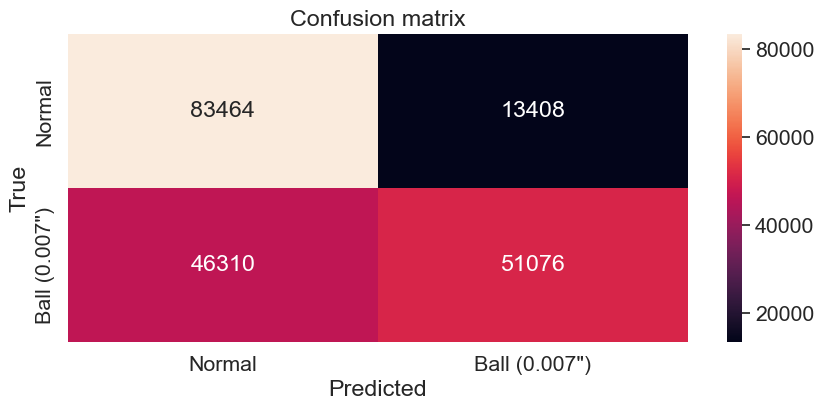

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Ball (0.007")']  
columns = ['Normal', 'Ball (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [17]:
classifier_b.evaluate(X_test, y_test)

6071/6071 [==============================] - 10s 2ms/step - loss: 0.5657 - accuracy: 0.6926


[0.56573885679245, 0.6925840973854065]

In [18]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Ball (0.007")'])
print(cr)

               precision    recall  f1-score   support

       Normal       0.64      0.86      0.74     96872
Ball (0.007")       0.79      0.52      0.63     97386

     accuracy                           0.69    194258
    macro avg       0.72      0.69      0.68    194258
 weighted avg       0.72      0.69      0.68    194258



In [19]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 59718


6071/6071 [==============================] - 8s 1ms/step


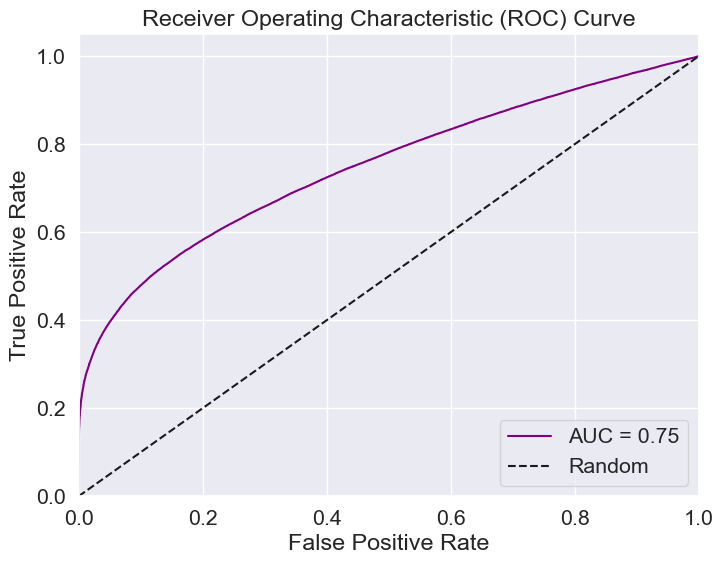

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obtain predicted probabilities for the positive class
y_prob = classifier_b.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
np.savez("roc_data_B007.npz", fpr=fpr, tpr=tpr, thresholds=thresholds)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()